## A CASE STUDY OF FACTORS AFFECTING LOAN APPROVAL

## 1. Defining the question

### a) Specifying the analysis question

Is there a relationship between gender, credit history and the area one lives and loan status?

### b) Defining the metric for success

Be able to obtain and run statistically correct hypothesis tests, and come to a meaningful conclusion

### c) Understanding the context

In finance, a loan is the lending of money by one or more individuals, organizations, or other entities to other individuals and organizations.

Borrowing a Loan will build your confidence in securing a loan. If you repay well your loan, you will have a good credit history and stand a chance of more loan. Borrowing loan is important. It helps you when you don't have cash on hand and will are of great help whenever you are in a fix.

### d) Recording the experimental design

We will be conducting Exploratory data analysis which includes Univariate analysis, Bivariate and multivariate analysis.

In order to answer our research question we will be carrying out hypothesis testing using Chi-square test to get the relationships and differences between our independent and target variables hence coming up with significant conclusions.



### e) Data Relevance

The dataset contains demographic information on factors that determine whether one gets a loan or not. 
This data was extracted from Kaggle, which is a reputable organization.
The information contained in our dataset was relevant for our analysis.

## 2. Importing relevant libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
import scipy.stats as stats
from sklearn.decomposition import PCA

## 3. Loading and checking the data

In [ ]:
# Loading our dataset

loans_df =  pd.read_csv('loans.csv')

In [ ]:
# Getting a preview of the first 10 rows

loans_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [ ]:
# Determining the number of rows and columns in the dataset

loans_df.shape

(614, 13)

In [ ]:
# Determining the names of the columns present in the dataset

loans_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
# Description of the quantitative columns

loans_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# Description of the qualitative columns

loans_df.describe(include = 'object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001813,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [ ]:
# Checking if each column is of the appropriate data type

loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## 4. External data source validation

> We validated our dataset using information from the following link:

> http://calcnet.mth.cmich.edu/org/spss/prj_loan_data.htm

## 5. Data cleaning


Uniformity

In [ ]:
# Changing all column names to lowercase, stripping white spaces
# and removing all underscores

loans_df.columns = loans_df.columns.str.lower().str.strip().str.replace("_","")

In [ ]:
# Confirming the changes made

loans_df.head(5)

,loanid,gender,married,dependents,education,selfemployed,applicantincome,coapplicantincome,loanamount,loanamountterm,credithistory,propertyarea,loanstatus
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Data Completeness

In [ ]:
# Determining the number of null values in each column

loans_df.isnull().sum()

loanid                0
gender               13
married               3
dependents           15
education             0
selfemployed         32
applicantincome       0
coapplicantincome     0
loanamount           22
loanamountterm       14
credithistory        50
propertyarea          0
loanstatus            0
dtype: int64

In [ ]:
#Imputing Loan Amount with mean

loans_df['loanamount'] = loans_df['loanamount'].fillna(loans_df['loanamount'].mean())

In [ ]:
#FowardFill For LoanTerm 

loans_df['loanamountterm'] = loans_df['loanamountterm'].fillna(method = "ffill")

In [ ]:
#Assuming Missing values imply bad credit History - replacing nulls with 0

loans_df['credithistory'] = loans_df['credithistory'].fillna(0)

In [ ]:
#Imputing gender, married, and selfemployed

loans_df['dependents']=loans_df['dependents'].fillna(loans_df['dependents'].mode()[0])
loans_df['gender']=loans_df['gender'].fillna(loans_df['gender'].mode()[0])
loans_df['married']=loans_df['married'].fillna(loans_df['married'].mode()[0])
loans_df['selfemployed']=loans_df['selfemployed'].fillna(loans_df['selfemployed'].mode()[0])

In [ ]:
# Confirming our changes after dealing with null values

loans_df.isnull().sum()

loanid               0
gender               0
married              0
dependents           0
education            0
selfemployed         0
applicantincome      0
coapplicantincome    0
loanamount           0
loanamountterm       0
credithistory        0
propertyarea         0
loanstatus           0
dtype: int64

In [ ]:
# Previewing the data

loans_df.head(10)

,loanid,gender,married,dependents,education,selfemployed,applicantincome,coapplicantincome,loanamount,loanamountterm,credithistory,propertyarea,loanstatus
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N


Data Consistency

In [ ]:
# Checking if there are any duplicated rows

loans_df.duplicated().sum()


0

In [ ]:
# Checking for any anomalies in the qualitative variables

qcol = ['gender', 'married', 'dependents', 'education',
       'selfemployed','credithistory', 'propertyarea', 'loanstatus']

for col in qcol:
  print(col, ':', loans_df[col].unique())

gender : ['Male' 'Female']
married : ['No' 'Yes']
dependents : ['0' '1' '2' '3+']
education : ['Graduate' 'Not Graduate']
selfemployed : ['No' 'Yes']
credithistory : [1. 0.]
propertyarea : ['Urban' 'Rural' 'Semiurban']
loanstatus : ['Y' 'N']


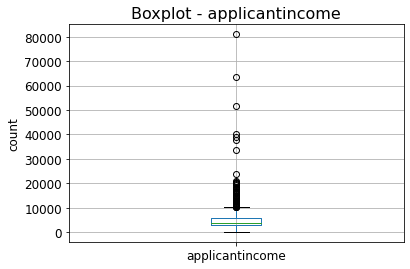

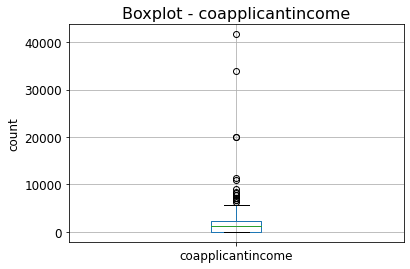

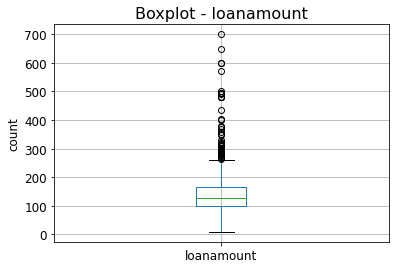

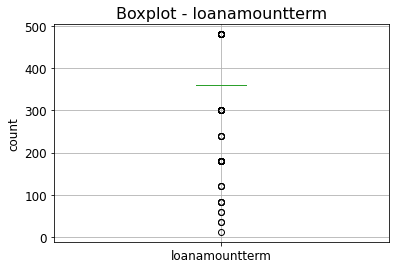

In [ ]:
#Checking for Outliers
cols = ['applicantincome','coapplicantincome', 'loanamount', 'loanamountterm']

for column in cols:
    plt.figure()
    loans_df.boxplot([column], fontsize= 12)
    plt.ylabel('count', fontsize = 12)
    plt.title('Boxplot - {}'.format(column), fontsize = 16)

In [ ]:
# Determining how many rows would be lost if outliers were removed

# Calculating our first, third quantiles and then later our IQR
# ---
Q1 = loans_df.quantile(0.25)
Q3 = loans_df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range and stores the result in the data frame 'auto'
# ---
# 
loans_df_new = loans_df[~((loans_df < (Q1 - 1.5 * IQR)) | (loans_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
# ---
# 
print(loans_df_new.shape)

# Printing the shape of our old dataset
# ---
#
print(loans_df.shape)

# Number of rows removed

rows_removed = loans_df.shape[0] - loans_df_new.shape[0]
rows_removed

# Percentage of rows removed of the percentage
row_percent = (rows_removed/loans_df.shape[0]) * 100
row_percent

(355, 13)
(614, 13)


42.18241042345277

In [ ]:
# Exporting our data

loans_df.to_csv('loanscleaned.csv')

## 6. Exploratory Data Analysis

### a) Univariate Analysis

In [ ]:
# Previewing the dataset

loans_df.head(4)

,loanid,gender,married,dependents,education,selfemployed,applicantincome,coapplicantincome,loanamount,loanamountterm,credithistory,propertyarea,loanstatus
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y


Yes = 422
No = 192
 
Proportion of Yes = 68.73%
Proportion of No  = 31.27%
 


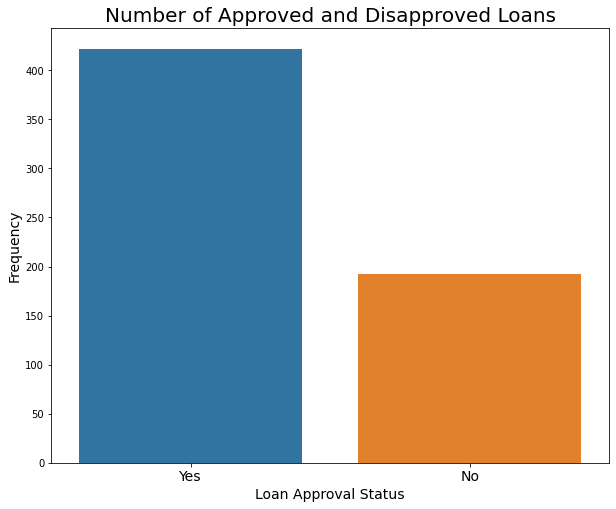

In [ ]:
# Loan Status

Yes = loans_df[loans_df["loanstatus"] == 'Y'].shape[0]
No = loans_df[loans_df["loanstatus"] == 'N'].shape[0]
print(f"Yes = {Yes}")
print(f"No = {No}")
print(' ')
print(f"Proportion of Yes = {(Yes / len(loans_df['loanstatus'])) * 100:.2f}%")
print(f"Proportion of No  = {(No / len(loans_df['loanstatus'])) * 100:.2f}%")
print(' ')                                                      
plt.figure(figsize=(10, 8))
sns.countplot(x = loans_df["loanstatus"])
plt.xticks((0, 1), ["Yes", "No"], fontsize = 14)
plt.xlabel("Loan Approval Status", fontsize = 14)
plt.ylabel("Frequency", fontsize = 14)
plt.title("Number of Approved and Disapproved Loans", y=1, fontdict={"fontsize": 20});

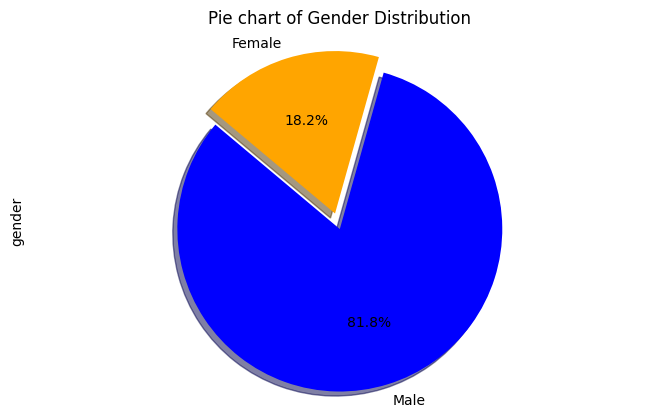

In [ ]:
# Pie Chart for Gender

gender = loans_df.gender.value_counts()
plt.figure(figsize= (8,5), dpi=100)

# Highlighting yes
explode = (0.1, 0)  
colors = ['blue', 'orange']

# Plotting our pie chart
gender.plot.pie(explode = explode, colors = colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Pie chart of Gender Distribution')
plt.show()

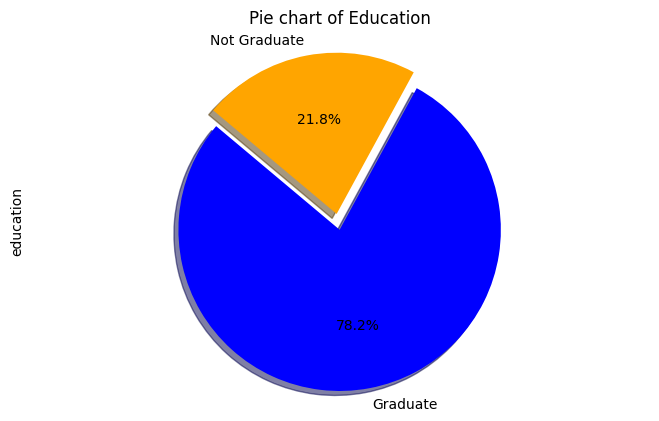

In [ ]:
# Pie Chart for Education

education = loans_df.education.value_counts()
plt.figure(figsize= (8,5), dpi=100)

# Highlighting yes
explode = (0.1, 0)  
colors = ['blue', 'orange']

# Plotting our pie chart
education.plot.pie(explode = explode, colors = colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Pie chart of Education')
plt.show()

Yes = 401
No = 213
 
Proportion of Yes = 65.31%
Proportion of No  = 34.69%
 


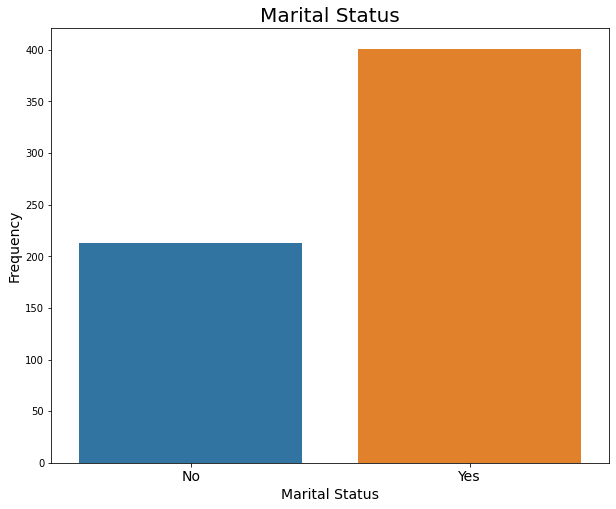

In [ ]:
# Marital status

Yes = loans_df[loans_df["married"] == 'Yes'].shape[0]
No = loans_df[loans_df["married"] == 'No'].shape[0]
print(f"Yes = {Yes}")
print(f"No = {No}")
print(' ')
print(f"Proportion of Yes = {(Yes / len(loans_df['married'])) * 100:.2f}%")
print(f"Proportion of No  = {(No / len(loans_df['married'])) * 100:.2f}%") 
print(' ')                                                     
plt.figure(figsize=(10, 8))
sns.countplot(x = loans_df["married"])
plt.xticks((0, 1), ["No", "Yes"], fontsize = 14)
plt.xlabel("Marital Status", fontsize = 14)
plt.ylabel("Frequency", fontsize = 14)
plt.title("Marital Status", y=1, fontdict={"fontsize": 20});

In [ ]:
# Frequency table for Property Area in percentage

round(loans_df.propertyarea.value_counts(normalize = True),2)

Semiurban    0.38
Urban        0.33
Rural        0.29
Name: propertyarea, dtype: float64

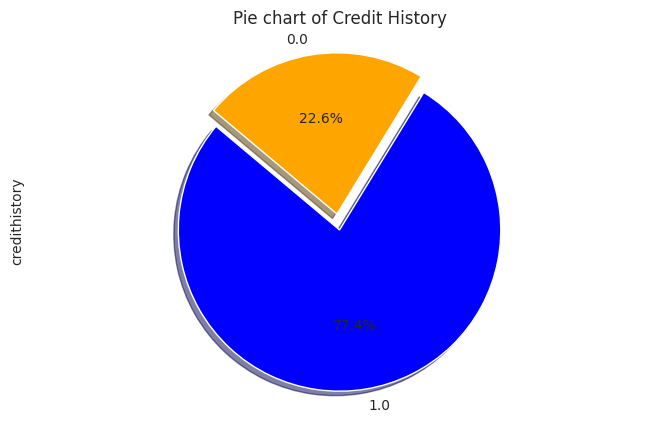

In [ ]:
# Pie Chart for Credit History

credit = loans_df.credithistory.value_counts()
plt.figure(figsize= (8,5), dpi=100)

# Highlighting yes
explode = (0.1, 0)  
colors = ['blue', 'orange']

# Plotting our pie chart
credit.plot.pie(explode = explode, colors = colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Pie chart of Credit History')
plt.show()

In [ ]:
# Frequency table for Self Employed status in percentage

round(loans_df.selfemployed.value_counts(normalize = True),2)

No     0.87
Yes    0.13
Name: selfemployed, dtype: float64

In [ ]:
# Frequency table for Dependents in percentage

round(loans_df.dependents.value_counts(normalize = True),2)

0     0.59
1     0.17
2     0.16
3+    0.08
Name: dependents, dtype: float64

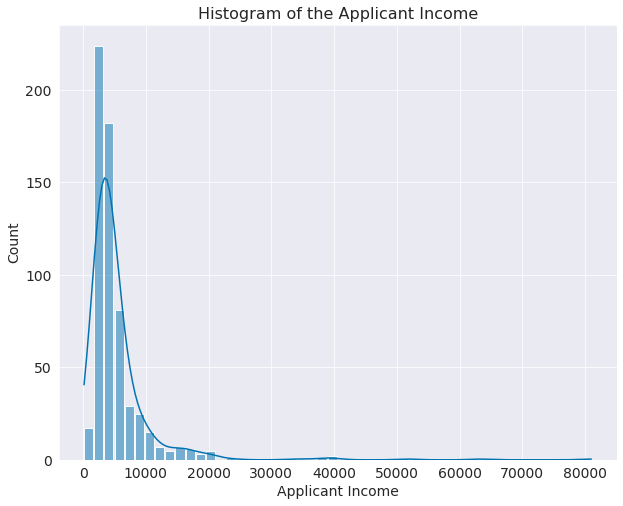

In [ ]:
# Histogram for Applicant Income

def histogram(var1, bins):
  plt.figure(figsize= (10,8)),
  sns.set_style('darkgrid'),
  sns.set_palette('colorblind'),
  sns.histplot(x = var1, data=loans_df,  bins = bins , shrink= 0.9, kde = True)

histogram('applicantincome', 50)
plt.title('Histogram of the Applicant Income', fontsize = 16)
plt.xlabel('Applicant Income', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [ ]:
# Checking on coefficent of variance, skewness and kurtosis

print('The skewness is:', loans_df['applicantincome'].skew())
print('The kurtosis is:', loans_df['applicantincome'].kurt())
print('The coefficient of variation is:', loans_df['applicantincome'].std()/loans_df['applicantincome'].mean())

The skewness is: 6.539513113994625
The kurtosis is: 60.54067593369113
The coefficient of variation is: 1.1305797551151708


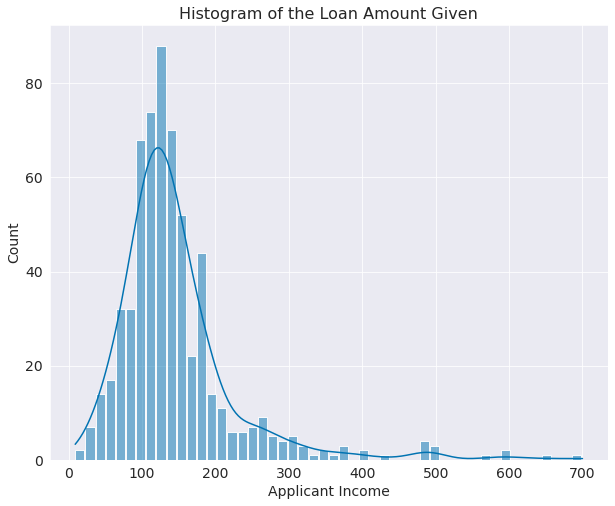

In [ ]:
# Histogram for Loan Amount

histogram('loanamount', 50)

plt.title('Histogram of the Loan Amount Given', fontsize = 16)
plt.xlabel('Applicant Income', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [ ]:
# Checking on coefficent of variance, skewness and kurtosis

print('The skewness is:', loans_df['loanamount'].skew())
print('The kurtosis is:', loans_df['loanamount'].kurt())
print('The coefficient of variation is:', loans_df['loanamount'].std()/loans_df['loanamount'].mean())

The skewness is: 2.726601144105299
The kurtosis is: 10.896456468091559
The coefficient of variation is: 0.5739787353875622


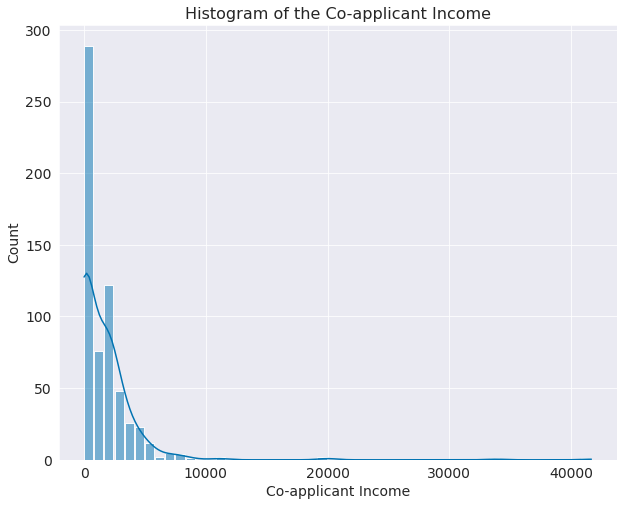

In [ ]:
# Histogram for Co-applicant Income

histogram('coapplicantincome', 50)

plt.title('Histogram of the Co-applicant Income', fontsize = 16)
plt.xlabel('Co-applicant Income', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [ ]:
# Checking on coefficent of variance, skewness and kurtosis

print('The skewness is:', loans_df['coapplicantincome'].skew())
print('The kurtosis is:', loans_df['coapplicantincome'].kurt())
print('The coefficient of variation is:', loans_df['coapplicantincome'].std()/loans_df['coapplicantincome'].mean())

The skewness is: 7.491531216657306
The kurtosis is: 84.95638421103374
The coefficient of variation is: 1.8049381363301926


In [ ]:
# Looking at the unique variables in amount

loans_df.loanamountterm.unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [ ]:
# Measures of central tendency for our quantitative variables

loans_df.describe()

,applicantincome,coapplicantincome,loanamount,loanamountterm,credithistory
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,341.628664,0.773616
std,6109.041673,2926.248369,84.037468,65.656819,0.418832
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


### b) Bivariate Analysis

In [ ]:
# Preview of dataset

loans_df.head(3)

,loanid,gender,married,dependents,education,selfemployed,applicantincome,coapplicantincome,loanamount,loanamountterm,credithistory,propertyarea,loanstatus
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y


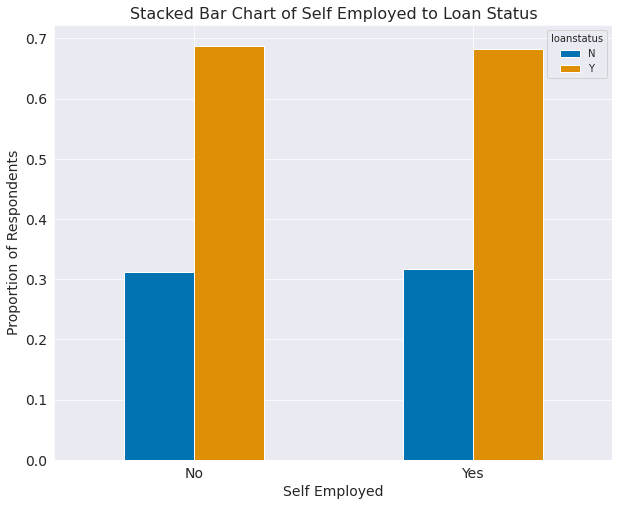

In [ ]:
# Comparison of Self employment Status and Loan Status 

table=pd.crosstab(loans_df['selfemployed'],loans_df['loanstatus'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize= (10,8), stacked=False)
plt.title('Stacked Bar Chart of Self Employed to Loan Status', fontsize = 16)
plt.xlabel('Self Employed', fontsize = 14)
plt.ylabel('Proportion of Respondents', fontsize = 14)
plt.xticks(rotation = 360, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

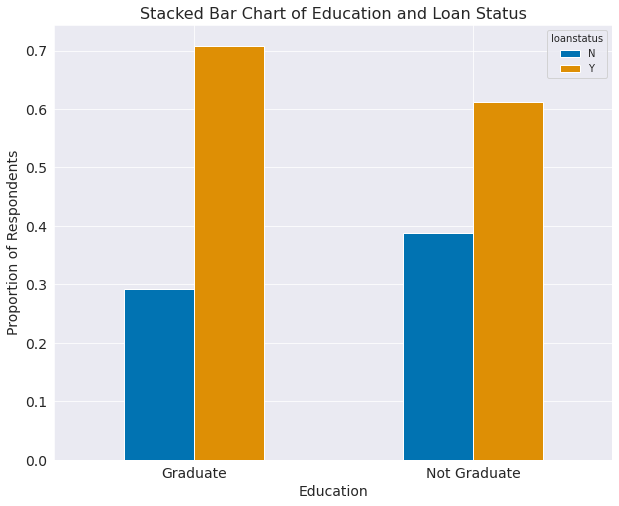

In [ ]:
# Comparison of Education and Loan Status

table=pd.crosstab(loans_df['education'],loans_df['loanstatus'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize = (10,8), stacked=False)
plt.title('Stacked Bar Chart of Education and Loan Status', fontsize = 16)
plt.xlabel('Education', fontsize = 14)
plt.ylabel('Proportion of Respondents', fontsize = 14)
plt.xticks(rotation = 360, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

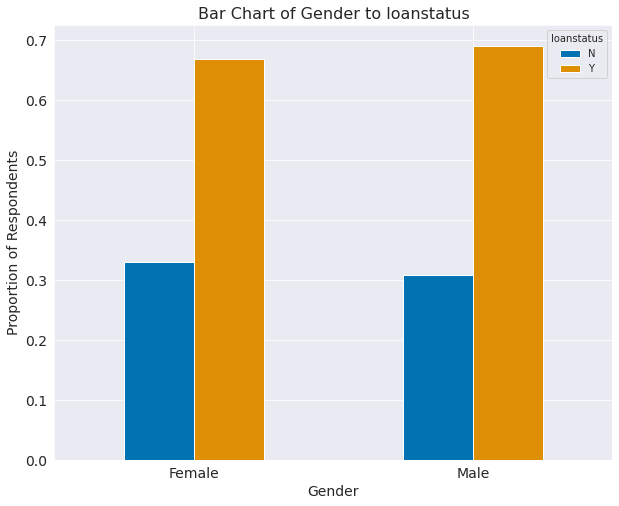

In [ ]:
# Comparison of Gender and Loan Status

table=pd.crosstab(loans_df['gender'],loans_df['loanstatus'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',figsize = (10,8), stacked=False)
plt.title('Bar Chart of Gender to loanstatus', fontsize = 16)
plt.xlabel('Gender', fontsize = 14)
plt.ylabel('Proportion of Respondents', fontsize = 14)
plt.xticks(rotation = 360, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

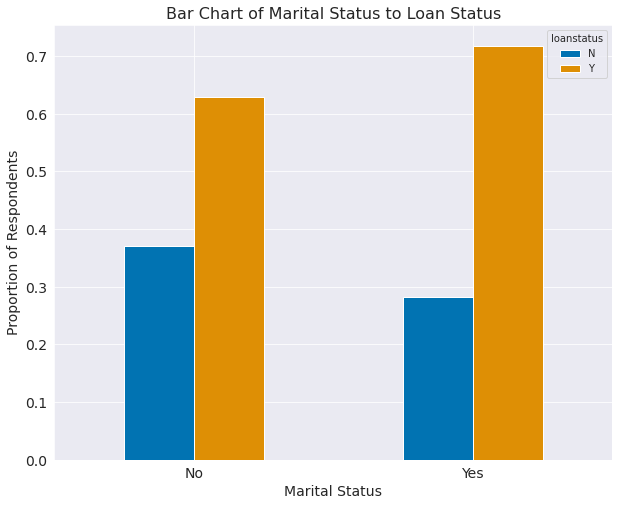

In [ ]:
# Comparison of Marital Status and Loan Status

table=pd.crosstab(loans_df['married'],loans_df['loanstatus'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize = (10,8), stacked=False)
plt.title('Bar Chart of Marital Status to Loan Status', fontsize = 16)
plt.xlabel('Marital Status',fontsize = 14)
plt.ylabel('Proportion of Respondents', fontsize = 14)
plt.xticks(rotation = 360, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

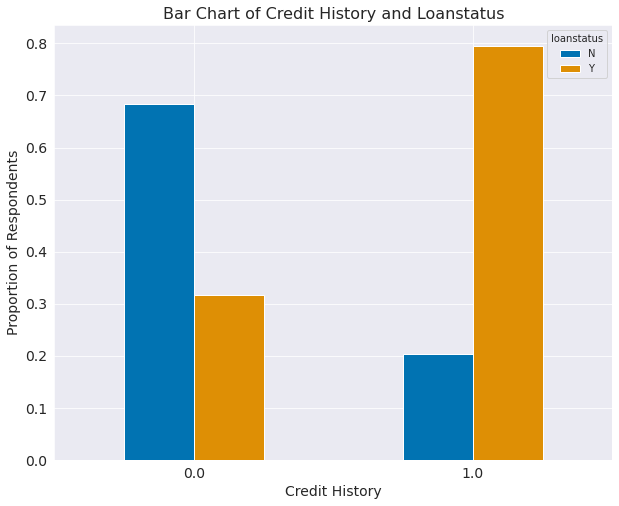

In [ ]:
# Comparison of Credit History and Loan Status

table=pd.crosstab(loans_df['credithistory'],loans_df['loanstatus'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize = (10,8), stacked=False)
plt.title('Bar Chart of Credit History and Loanstatus', fontsize = 16)
plt.xlabel('Credit History', fontsize = 14)
plt.ylabel('Proportion of Respondents', fontsize = 14)
plt.xticks(rotation = 360, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

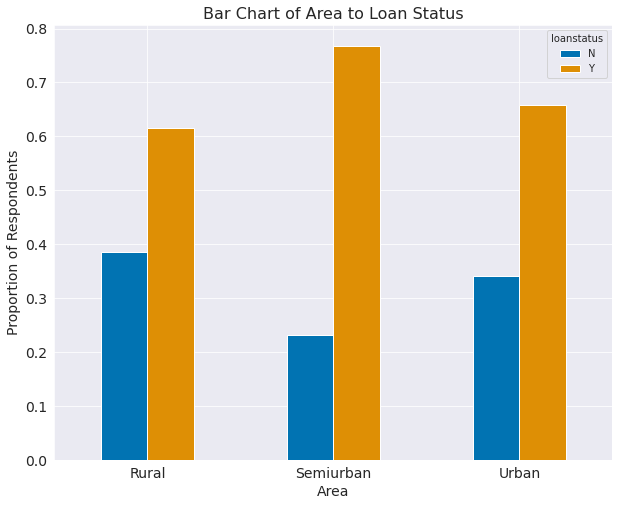

In [ ]:
# Comparison of Property Area and Loan Status

table=pd.crosstab(loans_df['propertyarea'],loans_df['loanstatus'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize = (10,8), stacked=False)
plt.title('Bar Chart of Area and Loan Status', fontsize = 16)
plt.xlabel('Area', fontsize = 14)
plt.ylabel('Proportion of Respondents', fontsize = 14)
plt.xticks(rotation = 360, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

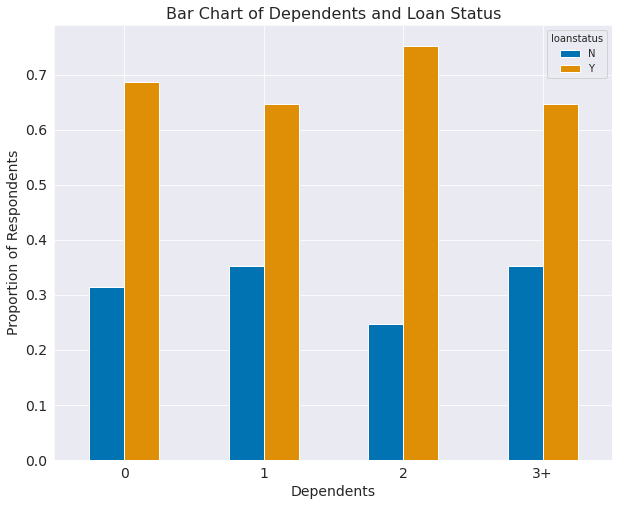

In [ ]:
# Comparison of Dependents and Loan Status

table=pd.crosstab(loans_df['dependents'],loans_df['loanstatus'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize = (10,8), stacked=False)
plt.title('Bar Chart of Dependents and Loan Status', fontsize = 16)
plt.xlabel('Dependents', fontsize = 14)
plt.ylabel('Proportion of Respondents', fontsize = 14)
plt.xticks(rotation = 360, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

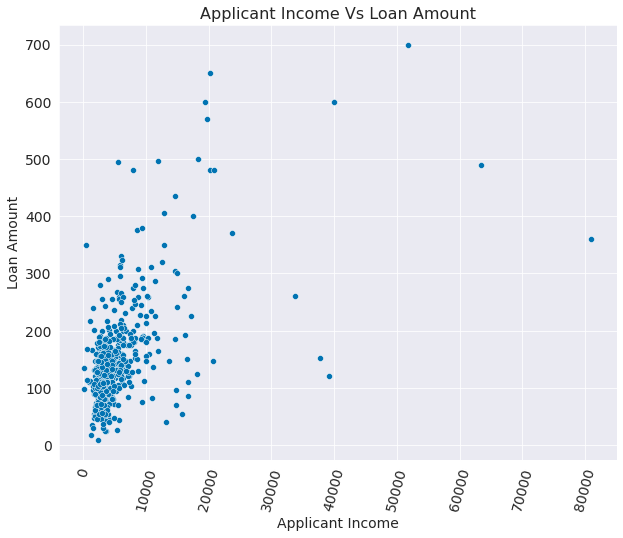

In [ ]:
#Scatterplot to show correlation between Applicant Income and Loan amount

plt.figure(figsize= (10,8))
sns.scatterplot(x= loans_df.applicantincome, y = loans_df.loanamount)
plt.title('Applicant Income Vs Loan Amount', fontsize = 16)
plt.ylabel('Loan Amount', fontsize=14)
plt.xlabel('Applicant Income', fontsize=14)
plt.xticks(rotation = 75, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [ ]:
# Correlation coefficient between applicant income and loan amount

loans_df['applicantincome'].corr(loans_df['loanamount'])

0.5656204566820277

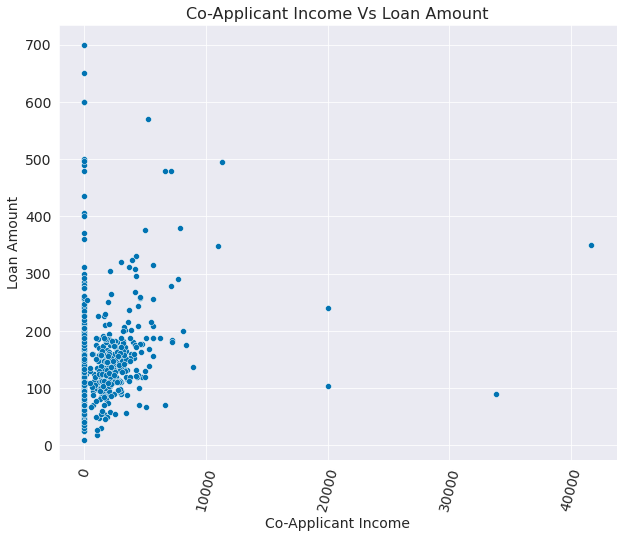

In [ ]:
#Scatterplot to show correlation between Co-Applicant Income and Loan amount

plt.figure(figsize= (10,8))
sns.scatterplot(x= loans_df.coapplicantincome, y = loans_df.loanamount)
plt.title('Co-Applicant Income Vs Loan Amount', fontsize = 16)
plt.ylabel('Loan Amount', fontsize=14)
plt.xlabel('Co-Applicant Income', fontsize=14)
plt.xticks(rotation = 75, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [ ]:
# Correlation coefficient between loan amount and co-applicant income

loans_df['coapplicantincome'].corr(loans_df['loanamount'])

0.18782839323334397

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


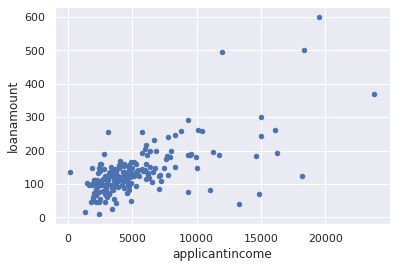

In [ ]:
# Scatterplot between Co-applicant income and Loan amount for 
# income less that 2000

loans_df[loans_df['coapplicantincome'] < 2000].sample(200).plot.scatter(x='applicantincome', y='loanamount')

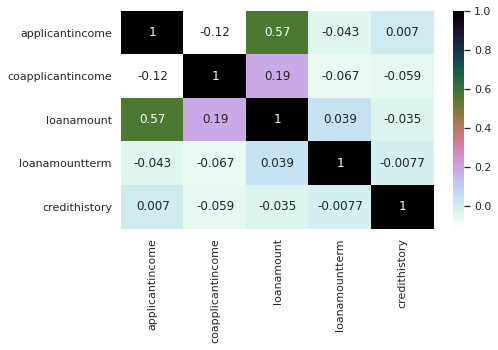

In [ ]:
# Correlation Heatmap

plt.figure(figsize=(7,4)) 
sns.heatmap(loans_df.corr(),annot=True,cmap='cubehelix_r') 
plt.show()

### c) Multivariate Analysis 

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.,  80000.,  90000.]),
 <a list of 11 Text major ticklabel objects>)

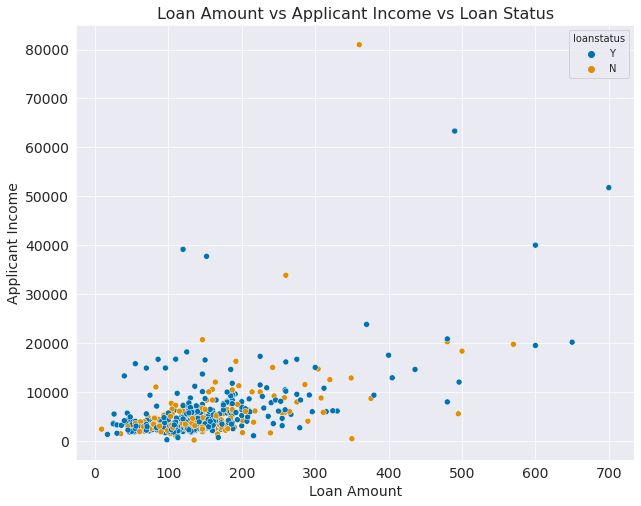

In [ ]:
# Analysis of Loan Status, Applicant income and Loan Amount

plt.figure(figsize=(10,8))
sns.scatterplot(x= loans_df['loanamount'], y=loans_df['applicantincome'], hue= loans_df['loanstatus'])
plt.title('Loan Amount vs Applicant Income vs Loan Status', fontsize = 16)
plt.xlabel('Loan Amount', fontsize = 14)
plt.ylabel('Applicant Income', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.,  80000.,  90000.]),
 <a list of 11 Text major ticklabel objects>)

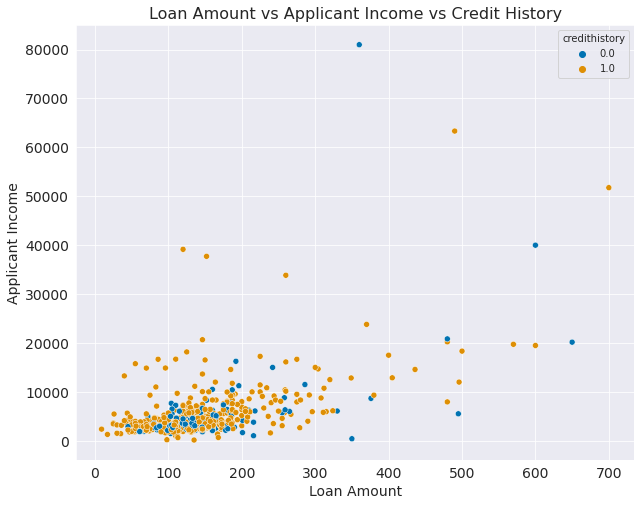

In [ ]:
# Analysis of Loan Status, Applicant income and Credit History

plt.figure(figsize=(10,8))
sns.scatterplot(x= loans_df['loanamount'], y=loans_df['applicantincome'], hue= loans_df['credithistory'])
plt.title('Loan Amount vs Applicant Income vs Credit History', fontsize = 16)
plt.xlabel('Loan Amount', fontsize = 14)
plt.ylabel('Applicant Income', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

## 7. Hypothesis testing

- The Chi-square test will be used for all hypothesis tests in our analysis.
- The level of significance to be used in all tests below will be 0.05 or 5% 

**Hypothesis 1:**

Ho : There is no relationship between credit history and the loan status

Ha : There is a relationship between credit history and the loan status


In [ ]:
# Creating a crosstab

tab = pd.crosstab(loans_df['loanstatus'], loans_df['credithistory'])
tab

credithistory,0.0,1.0
loanstatus,,
N,95,97
Y,44,378


In [ ]:
# Obtaining the observed values

observed_values = tab.values
print('Observed values: -\n', observed_values)

Observed values: -
 [[ 95  97]
 [ 44 378]]


In [ ]:
# Creating the chi square contingency table

val = stats.chi2_contingency(tab)
val

(112.69526773505117,
 2.5162224058605992e-26,
 1,
 array([[ 43.46579805, 148.53420195],
        [ 95.53420195, 326.46579805]]))

In [ ]:
# Obtaining the expected values

expected_values = val[3]
expected_values

array([[ 43.46579805, 148.53420195],
       [ 95.53420195, 326.46579805]])

In [ ]:
# Obtaining the degrees of freedom

rows = len(tab.iloc[0:2, 0])
columns = len(tab.iloc[0, 0:2])
dof = (rows-1)*(columns-1)
print('Degrees of Freedom', dof)

Degrees of Freedom 1


In [ ]:
# Obtaining the chi-square statistic

chi_square =sum([(o-e)**2./e for o,e in zip(observed_values,expected_values)])
chi_square
chi_square_statistic = chi_square[0]+chi_square[1]
chi_square_statistic

114.91431537284515

In [ ]:
# Getting the critical value
alpha = 0.05
critical_value = stats.chi2.ppf(q = 1-alpha, df = dof)

print('Critical Value:', critical_value)

Critical Value: 3.841458820694124


In [ ]:
# Getting p value

p_value = 1 - stats.chi2.cdf(x = chi_square_statistic, df= dof)
p_value



0.0

In [ ]:
# Conclusion

if chi_square_statistic>=critical_value:
  print('Reject Null Hypothesis')
else:
  print('Do not Reject Null Hypothesis')

Reject Null Hypothesis


The chi-square statistic is greater than the critical value hence we reject the null hypothesis that there is no relationship between credit history and loan status

At 5% level of significance, there is enough evidence to conclude that there is a relationship between credit history and loan status

**Hypothesis 2 :**

Ho : There is no relationship between  area and the loan status

Ha : There is a relationship between area  and the loan status

In [ ]:
# Creating a crosstab

tab = pd.crosstab(loans_df['loanstatus'], loans_df['propertyarea'])
tab

propertyarea,Rural,Semiurban,Urban
loanstatus,,,
N,69,54,69
Y,110,179,133


In [ ]:
# Obtaining the observed values

observed_values = tab.values
print('Observed values: -\n', observed_values)

Observed values: -
 [[ 69  54  69]
 [110 179 133]]


In [ ]:
# Creating the chi square contingency table

val = stats.chi2_contingency(tab)
val

(12.297623130485677,
 0.0021360187811644915,
 2,
 array([[ 55.97394137,  72.85993485,  63.16612378],
        [123.02605863, 160.14006515, 138.83387622]]))

In [ ]:
# Obtaining the expected values

expected_values = val[3]
expected_values

array([[ 55.97394137,  72.85993485,  63.16612378],
       [123.02605863, 160.14006515, 138.83387622]])

In [ ]:
# Obtaining the degrees of freedom

rows = len(tab.iloc[0:2, 0])
columns = len(tab.iloc[0, 0:2])
dof = (rows-1)*(columns-1)
print('Degrees of Freedom', dof)

Degrees of Freedom 1


In [ ]:
# Obtaining the chi-square statistic

chi_square =sum([(o-e)**2./e for o,e in zip(observed_values,expected_values)])
chi_square
chi_square_statistic = chi_square[0]+chi_square[1]
chi_square_statistic

11.513677192941685

In [ ]:
# Getting the critical value
alpha = 0.05
critical_value = stats.chi2.ppf(q = 1-alpha, df = dof)

print('Critical Value:', critical_value)

Critical Value: 3.841458820694124


In [ ]:
# Getting p value

p_value = 1 - stats.chi2.cdf(x = chi_square_statistic, df= dof)
p_value

0.0006908597661283711

In [ ]:
# Conclusion

if chi_square_statistic>=critical_value:
  print('Reject Null Hypothesis')
else:
  print('Do not Reject Null Hypothesis')

Reject Null Hypothesis


The chi-square statistic is greater than the critical value hence we reject the null hypothesis that there is no relationship between area and loan status

At 5% level of significance, there is enough evidence to conclude that there is a relationship between area and loan status

**Hypothesis 3 :**

Ho : There is no relationship between gender and the loan status

Ha : There is a relationship between gender and the loan status

In [ ]:
# Creating a crosstab

tab = pd.crosstab(loans_df['loanstatus'], loans_df['gender'])
tab

gender,Female,Male
loanstatus,,
N,37,155
Y,75,347


In [ ]:
# Obtaining the observed values

observed_values = tab.values
print('Observed values: -\n', observed_values)

Observed values: -
 [[ 37 155]
 [ 75 347]]


In [ ]:
# Creating the chi square contingency table

val = stats.chi2_contingency(tab)
val

(0.11087854691241235, 0.7391461310869638, 1, array([[ 35.0228013, 156.9771987],
        [ 76.9771987, 345.0228013]]))

In [ ]:
# Obtaining the expected values

expected_values = val[3]
expected_values

array([[ 35.0228013, 156.9771987],
       [ 76.9771987, 345.0228013]])

In [ ]:
# Obtaining the degrees of freedom

rows = len(tab.iloc[0:2, 0])
columns = len(tab.iloc[0, 0:2])
dof = (rows-1)*(columns-1)
print('Degrees of Freedom', dof)

Degrees of Freedom 1


In [ ]:
# Obtaining the chi-square statistic

chi_square =sum([(o-e)**2./e for o,e in zip(observed_values,expected_values)])
chi_square
chi_square_statistic = chi_square[0]+chi_square[1]
chi_square_statistic

0.19864165509874285

In [ ]:
# Getting the critical value
alpha = 0.05
critical_value = stats.chi2.ppf(q = 1-alpha, df = dof)

print('Critical Value:', critical_value)

Critical Value: 3.841458820694124


In [ ]:
# Getting p value

p_value = 1 - stats.chi2.cdf(x = chi_square_statistic, df= dof)
p_value

0.6558195040543224

In [ ]:
# Conclusion

if chi_square_statistic>=critical_value:
  print('Reject Null Hypothesis')
else:
  print('Do not Reject Null Hypothesis')

Do not Reject Null Hypothesis


The chi-square statistic is less than the critical value hence we do not reject the null hypothesis that there is no relationship between gender and loan status

At 5% level of significance, there is not enough evidence to conclude that there is a relationship between gender and loan status

## 8. Dimensionality reduction

In [ ]:
# PCA analysis with One Hot Encoding

dummy_Gender = pd.get_dummies(loans_df['gender'], prefix = 'Gender')
dummy_Married = pd.get_dummies(loans_df['married'], prefix = "Married")
dummy_Education = pd.get_dummies(loans_df['education'], prefix = "Education")
dummy_Self_Employed = pd.get_dummies(loans_df['selfemployed'], prefix = "Selfemployed")
dummy_Property_Area = pd.get_dummies(loans_df['propertyarea'], prefix = "Property")
dummy_Dependents = pd.get_dummies(loans_df['dependents'], prefix = "Dependents")
dummy_Loan_status = pd.get_dummies(loans_df['loanstatus'], prefix = "Approve")

In [ ]:
# Creating a list of our dummy data

frames = [loans_df,dummy_Gender,dummy_Married,dummy_Education,dummy_Self_Employed,dummy_Property_Area,dummy_Dependents,dummy_Loan_status]

In [ ]:
# Combining the dummy data with our dataframe

df_train = pd.concat(frames, axis = 1)

In [ ]:
# Previewing our training dataset

df_train.head(10)

,loanid,gender,married,dependents,education,selfemployed,applicantincome,coapplicantincome,loanamount,loanamountterm,credithistory,propertyarea,loanstatus,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Selfemployed_No,Selfemployed_Yes,Property_Rural,Property_Semiurban,Property_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Approve_N,Approve_Y
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,0,1,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,1,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,0,1,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,0,1
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N,0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y,0,1,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0


In [ ]:
# Dropping of non-numeric columns as part of pre-processing

df_train = df_train.drop(columns = ['loanid', 'gender', 'married', 'dependents', 'education','selfemployed', 'propertyarea','loanstatus','Approve_N'])

In [ ]:
# Previewing the final dataset for our analysis

df_train

,applicantincome,coapplicantincome,loanamount,loanamountterm,credithistory,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Selfemployed_No,Selfemployed_Yes,Property_Rural,Property_Semiurban,Property_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Approve_Y
0,5849,0.0,146.412162,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1
610,4106,0.0,40.000000,180.0,1.0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,1,1
611,8072,240.0,253.000000,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1,0,1,0,0,1
612,7583,0.0,187.000000,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1,0,0,1,0,1


In [ ]:
# Preprocessing 

X=df_train.drop(['Approve_Y'],axis=1)
y=df_train['Approve_Y']

In [ ]:
# Splitting into training and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
# Normalization

# Dependents had an issue because of the +

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Applying PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=6)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# Obtaining the explained variance ratio which returns the variance caused by each of the principal components. 
# We execute the following line of code to find the "explained variance ratio"

explained_variance = pca.explained_variance_ratio_

explained_variance

array([0.15721044, 0.11464194, 0.10159128, 0.08592248, 0.07838558,
       0.07440071])

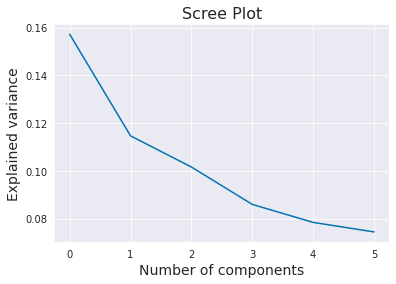

In [ ]:
# Plotting our scree plot

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of components', fontsize = 14)
plt.ylabel('Explained variance', fontsize = 14)
plt.title('Scree Plot', fontsize = 16)
plt.show()

In [ ]:
# Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[ 0 33]
 [ 0 90]]
Accuracy 0.7317073170731707


## 9. Challenging the solution

If we had more knowledge on machine learning, we would have built a classification model to accompany the hypothesis tests and hence strengthen our analysis.

## 10. Follow-up questions

At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.


### a) Did we have the right data?
> Yes. The data was relevant in context to our research.

### b) Do we need other data to answer the question?
> Our data was quite right but if there was a way we could collect more data on the same it would be better.

### c) Did we have the right question?
> Yes

## 11. Conclusions and Recommendations
> From our exploratory data analysis and statistical analysis techniques we have made some observations therefore we can draw some conclusions.

> - In consideration of this dataset containing a substantial amount of outliers standing at 42%, it deemed best not to drop them because in the case of loans, some questions are sensitive eg gender.
- The number of loans approved was 69% and disapproved loans were 31%
- It appears that males apply for more loans than women because males are 82% and females are 18%. Same case applies to graduates. This is because they have high numbers in loan applications. It would make one wonder if graduates are not being paid well or they need the loans to facilitate other things like investments
- There was no significant difference between number of approved loans considering that a person is self employed or not. This implies that loan approval is more dependent on applicant income.
- About 78% of loans were approved for applicants with good credit history.
- There was a high number of approved loans for applicant coming from semi-urban areas. This would suggest that they could have higher income.
- The number of dependents affects an applicants loan approval rate. It was interesting to find that people with 2 dependents had more loan approvals.
- We also find out that credit history have a significantly high relationship with loan approval.
- There is a relationship between area and loan status
- Undoubtedly, despite more males applying for loans, gender does not affect whether a loan is approved or not.
- It is discovered that those earning between 0 and 20,000 go for smaller loans amounts. If the bank capitalizes on offering good rates, they can make good profits since smaller loans have shorter repayment periods.

We recommend that the lender should prioritize people with good credit history and high income earners. 
The lenders should have better data collection methods to capture more data in order for the models to make more accurate predictions.